In [1]:
# Loading the important modules 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

C:\Users\vdhinakaran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Download data from http://archive.ics.uci.edu/ml/machine-learning-databases/00222/
data = pd.read_csv('./data/bank/bank-full.csv', header = 0, delimiter=';')

In [3]:
#printintg the record and column count
print(data.shape)

(45211, 17)


In [4]:
# Dropping all the null values 
data = data.dropna()

In [5]:
print(data.shape)

(45211, 17)


In [6]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [9]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
data['y']=np.where(data['y'] =='no', 0, data['y'])
data['y']=np.where(data['y'] =='yes', 1, data['y'])

In [11]:
data['y'].unique()

array([0, 1], dtype=object)

In [13]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


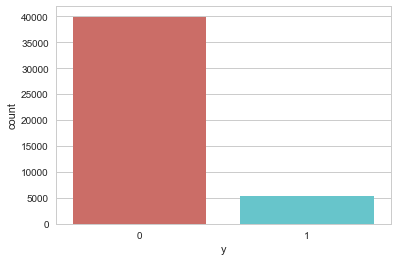

In [14]:
sns.countplot(x='y', data = data, palette='hls')
plt.show()

In [15]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Text(0,0.5,'Frequency of Purchase')

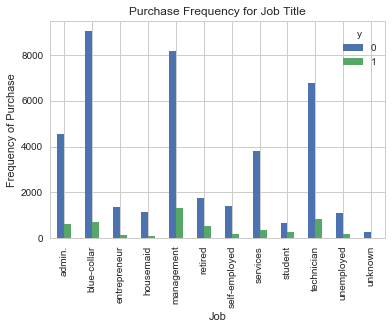

In [16]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Proportion of Customers')

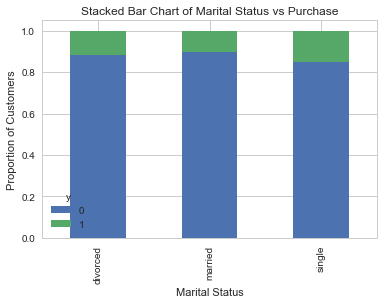

In [17]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0,0.5,'Proportion of Customers')

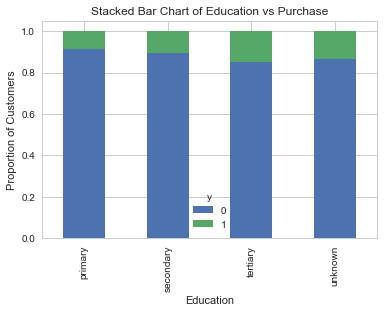

In [18]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

In [19]:
cat_vars=['marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var    
    cat_list = pd.get_dummies(data[var], prefix=var)
    #data1=data.join(cat_list)
    data1=pd.concat([data, cat_list], axis=1)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [20]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns


In [21]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

C:\Users\vdhinakaran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vdhinakaran\AppData\Local\Continuum\anaconda3\lib\site-packages\imblearn\utils\validation.py:77: UserWarning: 'y' should be of types ('binary', 'multiclass') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
C:\Users\vdhinakaran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [31]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)

print(type(os_data_X.reset_index().values.ravel()))
print(np.shape(os_data_X.reset_index().values))

print(type(os_data_y.values.ravel()))
print(np.shape(os_data_y.values.ravel()))

rfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(float))
print(rfe.support_)
print(rfe.ranking_)

<class 'numpy.ndarray'>
(55906, 40)
<class 'numpy.ndarray'>
(55906,)
[False False False False False False False False  True False False False
 False False False False  True False  True False  True  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[18 20 17 16  8 19 15  6  1  5 10 14  3 13  7 11  1  2  1  4  1  1  1  9
  1  1  1  1  1 12  1  1  1  1  1  1  1  1  1]


In [35]:
cols=['default_no', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

X=os_data_X[cols]
y=os_data_y['y']

logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.578769
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.165     
Dependent Variable:  y                AIC:              64741.3014
Date:                2018-10-08 14:31 BIC:              64866.3414
No. Observations:    55906            Log-Likelihood:   -32357.   
Df Model:            13               LL-Null:          -38751.   
Df Residuals:        55892            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
default_no        -0.8717   0.0392 -22.2166 0.0000 -0.9486 -0.7948
contact_cellular   1.3311   0.0327  40.7059 0.0000  1

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train.astype(float), y_train.astype(float))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.astype(float), y_test.astype(float))))

Accuracy of logistic regression classifier on test set: 0.70


In [46]:
type(y_test)

pandas.core.series.Series

In [52]:
confusion_matrix = metrics.confusion_matrix(np.asarray(y_test.values.astype(float)), y_pred)
print(confusion_matrix)

[[6967 1401]
 [3665 4739]]


In [53]:
print(metrics.classification_report(np.asarray(y_test.values.astype(float)), y_pred))


             precision    recall  f1-score   support

        0.0       0.66      0.83      0.73      8368
        1.0       0.77      0.56      0.65      8404

avg / total       0.71      0.70      0.69     16772



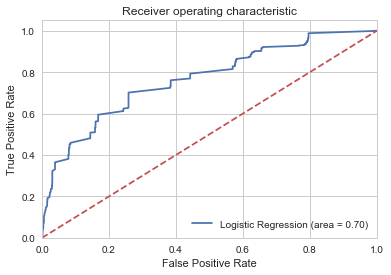

In [56]:
logit_roc_auc = metrics.roc_auc_score(np.asarray(y_test.values.astype(float)), y_pred)
fpr, tpr, thresholds = metrics.roc_curve(np.asarray(y_test.values.astype(float)), logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()